<a href="https://colab.research.google.com/github/RohanOpenSource/ml-notebooks/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

Firstly, we will use sklearn to make a perceptron. A perceptron is not very good, and can only fit a linear dataset.

In [3]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

We can make a perceptron using keras as well.

In [4]:
per_clf_keras = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid)
])
per_clf_keras.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])
per_clf_keras.fit(X, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 3ms/step - loss: 0.6148 - accuracy: 0.6667
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.6667
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.6667
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.6667
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.5134 - accuracy: 0.6667
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.6667
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.6667
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4683 - accuracy: 0.6667
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.6667


This is horrible because it is a perceptron. We will now move on to multi-layer perceptrons otherwise know as MLPs.

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] /  255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

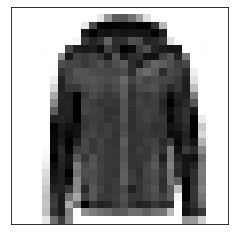

In [8]:
from matplotlib import pyplot as plt
fig = plt.imshow(X_train[0], cmap="Greys")#should be a coat
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [9]:
X_test[0].shape

(28, 28)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))#as you can see from the last code block our images are 28 by 28 pixels
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))#we have 10 different classes thus we need 10 output neurons
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7445 - accuracy: 0.7541 - val_loss: 0.5060 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4908 - accuracy: 0.8302 - val_loss: 0.4802 - val_accuracy: 0.8314
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4434 - accuracy: 0.8445 - val_loss: 0.4074 - val_accuracy: 0.8638
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4162 - accuracy: 0.8539 - val_loss: 0.3943 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3952 - accuracy: 0.8607 - val_loss: 0.4132 - val_accuracy: 0.8544
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3791 - accuracy: 0.8646 - val_loss: 0.3686 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3656 - accuracy: 0.8717 - val_loss: 0.3760 - val_accuracy:

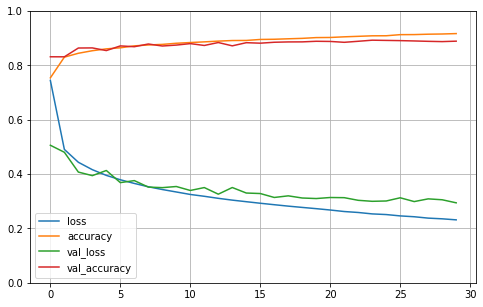

In [12]:
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8819


[0.335666686296463, 0.8819000124931335]

In [14]:
X_new = X_test[:3] #first 3 instances
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
y_pred_1 = np.argmax(model.predict(X_test[0].reshape(1, 28, 28)))
y_pred_2 = np.argmax(model.predict(X_test[1].reshape(1, 28, 28)))
y_pred_3 = np.argmax(model.predict(X_test[2].reshape(1, 28, 28)))
class_names[y_pred_1], class_names[y_pred_2], class_names[y_pred_3]

('Ankle boot', 'Pullover', 'Trouser')

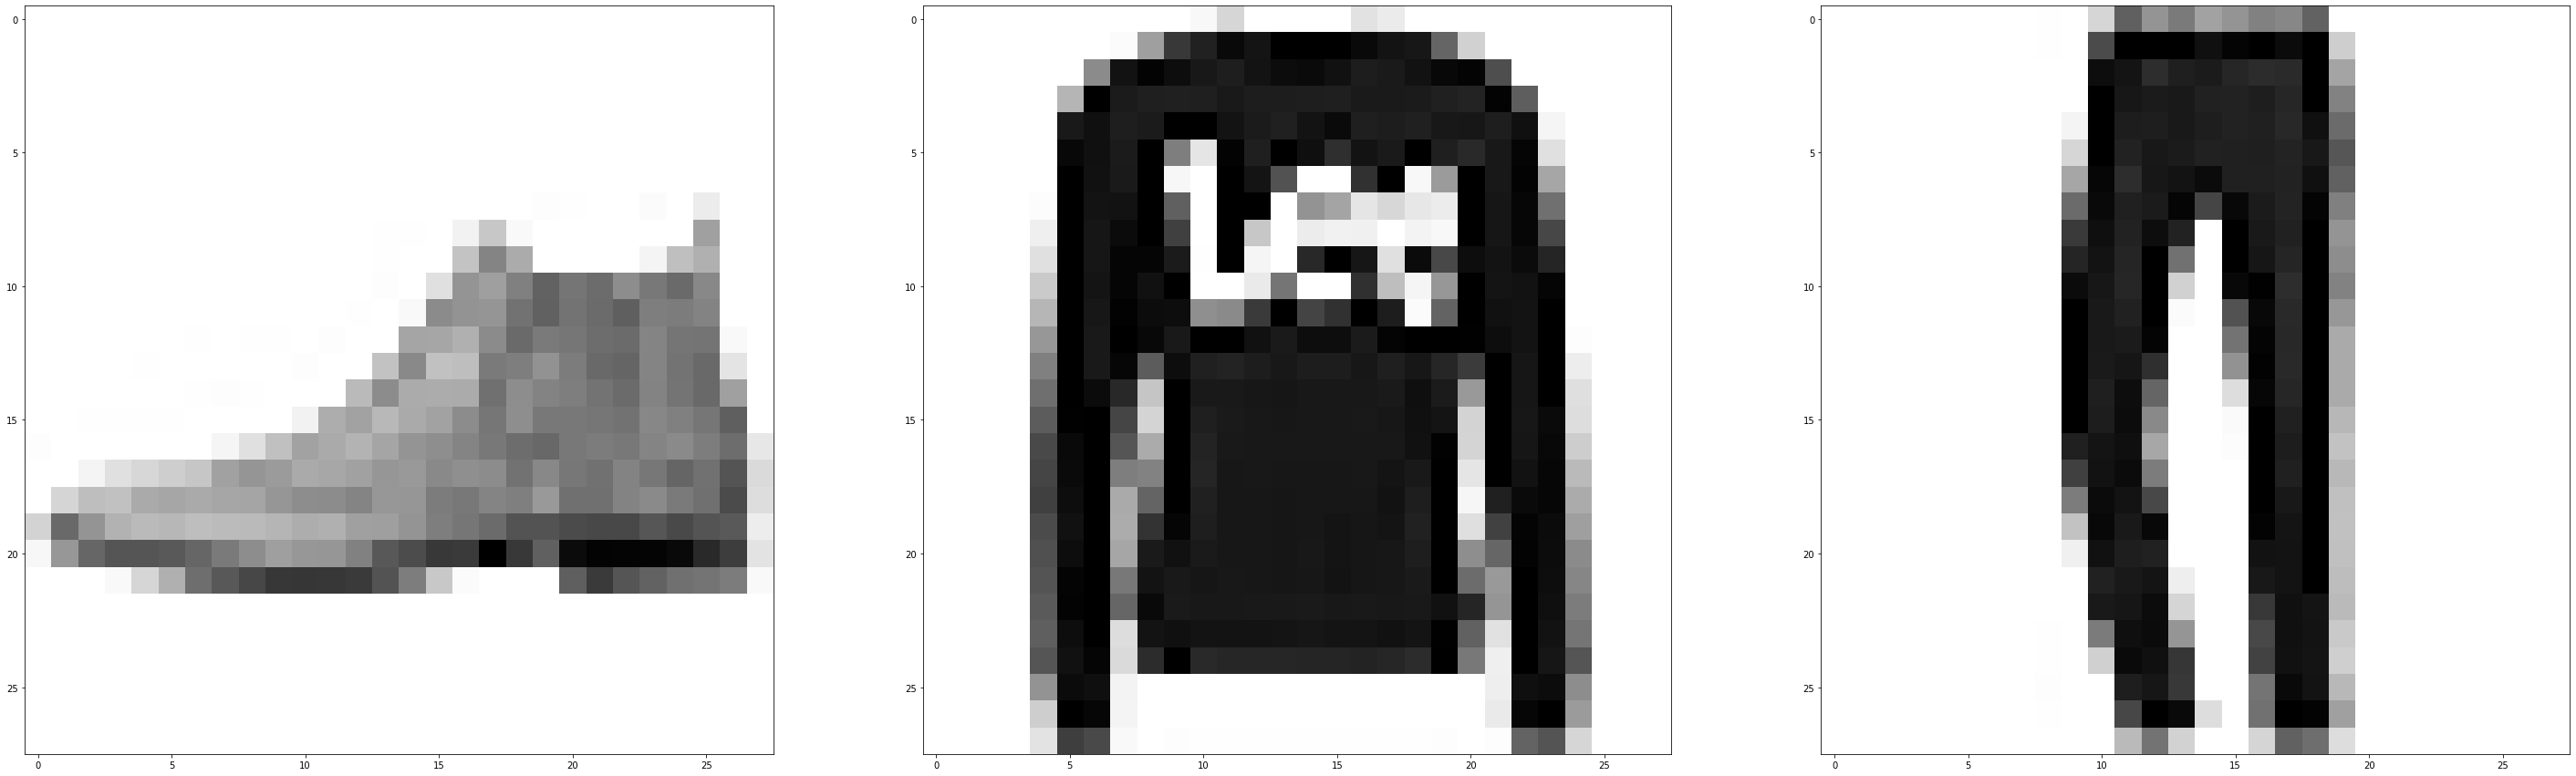

In [22]:
fig = plt.figure(figsize=(3, 1))
fig.add_subplot(1,3,1)
plt.imshow(X_test[0], cmap="Greys")
fig.add_subplot(1,3,2)
plt.imshow(X_test[1], cmap="Greys")
fig.add_subplot(1,3,3)
plt.imshow(X_test[2], cmap="Greys")
fig.set_size_inches(50, 16.5)
plt.show()

Ok this is good a convolutional neural network would be better but I already made one in another notebook. Now we will move on to doing regression with MLPs.

In [63]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [64]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2bb2fd0990>>

In [65]:
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.9876
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6181
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5098
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4598
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4367
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4202
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4133
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4060
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3974
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3942
Epoch 11/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3878
Epoch 12/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3854
Epoch 13/30
363/363 [====

In [66]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3216


0.3215877413749695

This works pretty well! Now we will try to build complex models with the keras functional api rather than the sequential api.

In [67]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
h1 = tf.keras.layers.Dense(30, activation="relu")(input_)
h2 = tf.keras.layers.Dense(30, activation="relu")(h1)
concat = tf.keras.layers.Concatenate()([input_, h2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

Now let's make a specialized neural network with the functional api

In [68]:
ia = tf.keras.layers.Input(shape=[5], name="wide_input")
ib = tf.keras.layers.Input(shape=[6], name="deep_input")
h1 = tf.keras.layers.Dense(30, activation="relu")(ia)
h2 = tf.keras.layers.Dense(30, activation="relu")(h1)
c = tf.keras.layers.concatenate([ia, h2])
o = tf.keras.layers.Dense(1, name="output")(c)
model = tf.keras.Model(inputs=[ia, ib], outputs=[o])

In [69]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())

X_train_a, X_train_b = X_train[:, :5], X_train[:, 2:]
X_valid_a, X_valid_b = X_valid[:, :5], X_valid[:, 2:]
X_test_a, X_test_b = X_test[:, :5], X_test[:, 2:]
X_new_a, X_new_b = X_test[:3], X_test[:3]

model.fit((X_train_a, X_train_b), y_train, epochs=20) #for some reason the validation data was giving me an error

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1903
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5802
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5483
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5446
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5300
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5208
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5111
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5077
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5117
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5034
Epoch 11/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4997
Epoch 12/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4991
Epoch 13/20
363/363 [====

This is all for this notebook. The next one will be quite interesting.